# Image segmentation

In this lab exercise, you will look at applying image segmentation techniques to images and compare two different methods. This work is not assessed (it will not count towards your module mark) but you will get informative feedback.

## 1. Intermodes Segmentation (Histogram-Based Thresholding)
This exercise focuses on using the image histogram to find an optimal threshold, a classic segmentation approach often used for bimodal or multimodal images (like cells on a background).

## Task 1
Implement image segmentation based on the Intermodes method. Iteratively identify the valley between two peaks (modes) in the smoothed version of the histogram. Then detect the suboptimal threshold T as the midpoint between the two modes.

**QUESTION 1: .Show your code, initial and final smoothed histograms and input and output segmented image in the report.**

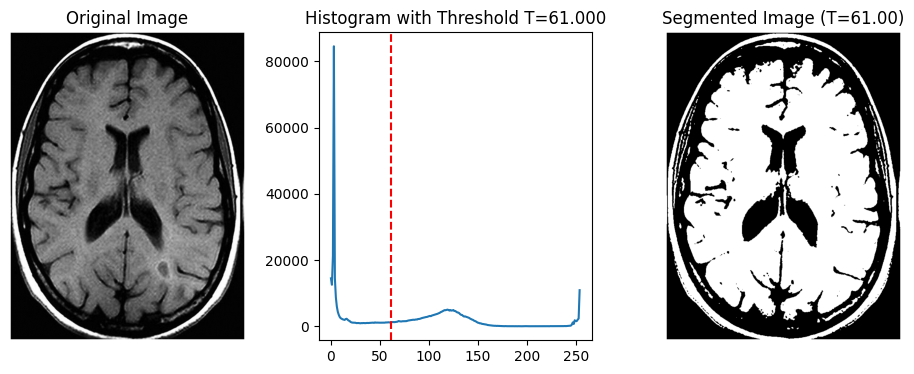

61.0


In [3]:
# Imports
import skimage
import scipy
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
import numpy as np


from scipy.ndimage import gaussian_filter1d # For smoothing the 1D histogram

# Assume a bimodal grayscale image 'img' is loaded (e.g., cell culture, documents).
img = skimage.io.imread('mri2.jpg', as_gray=True)

# ----------------------------------------
# 1. Compute Initial Histogram
# ----------------------------------------
# Calculate the raw histogram (counts) and the normalised bins (0 to 255)
hist, bins = np.histogram(img.flatten(), bins=np.max(img), range=(0, np.max(img)))

T = 20  # Example value - student must justify based on plot
img_segmented = np.zeros_like(img)
img_segmented[img > T] = 1.0


sigma_smooth = 2.0
max_iterations = 40
iterations = 0
max_i, max_j = -1, -1
smoothed_hist = hist

while iterations < max_iterations:
    # 2.1. Apply 1D Gaussian smoothing
    smoothed_hist = gaussian_filter1d(smoothed_hist, sigma=sigma_smooth)

    # 2.2. Find local maxima indices
    # Pad the smoothed histogram to check neighbors easily
    is_peak = (smoothed_hist[1:-1] > smoothed_hist[:-2]) & (smoothed_hist[1:-1] > smoothed_hist[2:])
    
    # Get indices, add 1 because we sliced off the edges [1:-1]
    modes_indices = np.where(is_peak)[0] + 1
    
    # Optional: Filter out very small peaks that might persist
    if len(modes_indices) > 2:
        # Sort indices by their peak height and take the top 2
        peak_heights = smoothed_hist[modes_indices]
        top_two_indices = modes_indices[np.argsort(peak_heights)[-2:]]
        
        # Check if the difference between the top two modes is still large
        if len(top_two_indices) == 2:
            modes_indices = top_two_indices

    # 2.3. Check the number of modes
    if len(modes_indices) == 2:
        max_i = bins[modes_indices[0]] # Intensity level
        max_j = bins[modes_indices[1]] # Intensity level
        break

    iterations += 1
    if iterations == max_iterations:
        print("Warning: Failed to converge to exactly two modes.")
        max_i, max_j = modes_indices[0], modes_indices[-1] # Fallback to top/bottom two if needed

# 3. Calculate Threshold and Segment
if max_i != -1 and max_j != -1:
    # Compute the threshold T,
    T = 0.5 * (max_i + max_j)
    
    # Apply threshold T to the image
    img_segmented = (img > T).astype(float)
else:
    img_segmented = np.zeros_like(img) # Default to blank if calculation failed

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
# Plot the histogram and overlay the chosen threshold (vertical line)
# ... (Student code to plot histogram, then plt.axvline(T, color='r', linestyle='--')) 
plt.plot(bins[:-1], hist)
plt.axvline(T, color='r', linestyle='--')
plt.title(f'Histogram with Threshold T={T:.3f}')

plt.subplot(1, 3, 3)
plt.imshow(img_segmented, cmap='gray')
plt.title(f'Segmented Image (T={T:.2f})')
plt.axis('off')
plt.show()

print(T)

# Task 2
Segmentation with K-Means Clustering. This exercise demonstrates how clustering (unsupervised learning) can be used to group pixels based on their intensity into a predefined number of segments ($K$).

Apply the K-Means algorithm to segment an image into $K$ intensity or colour clusters. This shows you that segmentation isn't just binary thresholding.

**QUESTION 2: Apply the K-Means algorithm to segment an image into $K={2,3,4}$ intensity clusters. Which regions have you detected? (Perform a quick search of the possible answers). Show your code, initial and final image in the report.**

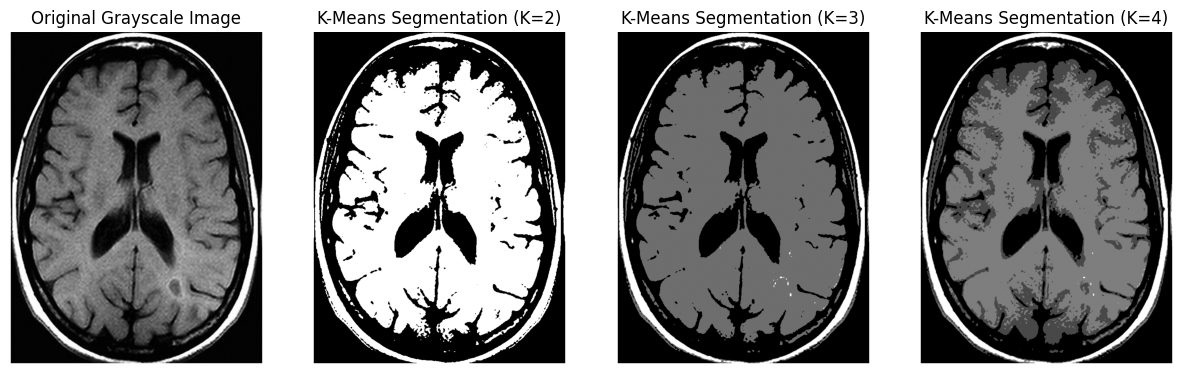

In [5]:
# Complete Task 2 here
from sklearn.cluster import KMeans # For simplicity and stability

# Assume a grayscale image 'img_gray' is loaded and is an 8-bit integer array
# (uint8) in the range [0, 255].

## 1. Prepare Data for K-Means
# K-Means expects a 2D array of (N_samples, N_features).
# For grayscale, N_features = 1 (intensity). N_samples is (Height * Width).

# -----------------
# 1.1. YOUR CODE HERE: Reshape the image data
# -----------------
h, w = img.shape
data = img.reshape((-1, 1)) # Reshape to (N_pixels, 1)

result_images = {}
for K in [2, 3, 4]:
    # Initialize the KMeans object with the number of clusters
    kmeans = KMeans(n_clusters=K, random_state=0)

    # Fit the data and kmeans model
    kmeans.fit(data)

    # Obtain the prediction of all data points of the reshaped image
    labels = kmeans.predict(data).reshape(h, w)
    centers = kmeans.cluster_centers_.flatten()

    # Obtain the centroids

    ## 3. Reconstruct the Segmented Image
    # Replace each pixel with the intensity value of its assigned cluster centre.


    # -----------------
    # 3.1. YOUR CODE HERE: Reconstruct the image
    # -----------------
    # Ensure centres are cast back to the integer type expected by the image.
    # Note: Use np.round() before casting to uint8 for better results.
    # reshape the segmented data (remember it was vectorised) and store it in img_segmented


    segmented_data = np.round(centers[labels]).astype(np.uint8)
    img_segmented = segmented_data.reshape(h, w)
    result_images[K] = img_segmented


# --- Display Code (Do Not Modify) ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

for K in [2, 3, 4]:
    plt.subplot(1, 4, K)
    plt.imshow(result_images[K], cmap='gray')
    plt.title(f'K-Means Segmentation (K={K})')
    plt.axis('off')
plt.show()
